In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Configuración de estilo
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# 1. Carga y preparación de datos
df = pd.read_csv('supermarket_sales.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Month_Num'] = df['Date'].dt.month # Para ordenar cronológicamente

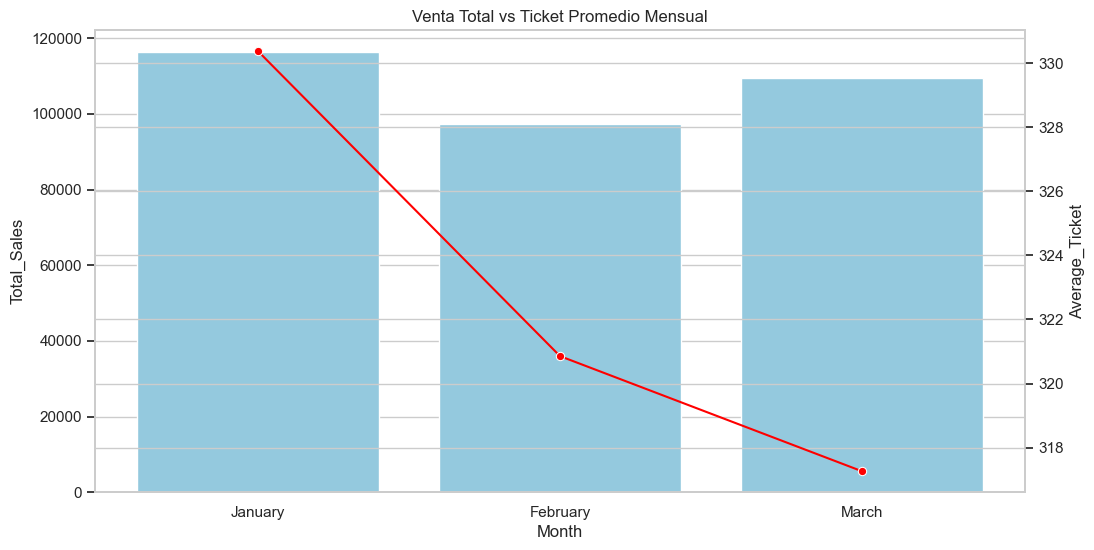

In [4]:
# --- REPORTE 1: Ventas y Factura Promedio ---
monthly_sales = df.groupby(['Month_Num', 'Month']).agg({
    'Total': ['sum', 'mean']
}).reset_index()
monthly_sales.columns = ['Month_Num', 'Month', 'Total_Sales', 'Average_Ticket']

fig, ax1 = plt.subplots()
sns.barplot(data=monthly_sales, x='Month', y='Total_Sales', color='skyblue', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_sales, x='Month', y='Average_Ticket', marker='o', color='red', ax=ax2)
ax1.set_title('Venta Total vs Ticket Promedio Mensual')
plt.show()

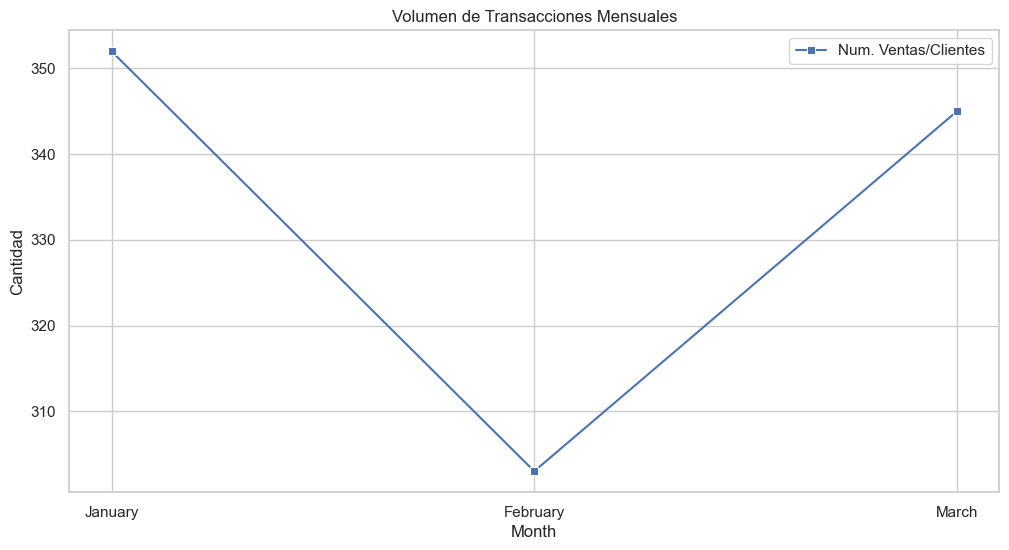

In [5]:
# --- REPORTE 2: Número de Ventas y Clientes Mensuales ---
monthly_counts = df.groupby(['Month_Num', 'Month']).agg({
    'Invoice ID': 'count',
    'Customer type': 'count' # En este dataset cada fila es una venta/cliente único por transacción
}).reset_index()

sns.lineplot(data=monthly_counts, x='Month', y='Invoice ID', marker='s', label='Num. Ventas/Clientes')
plt.title('Volumen de Transacciones Mensuales')
plt.ylabel('Cantidad')
plt.show()

C:\Users\Beto\AppData\Local\Temp\ipykernel_6824\947512871.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_counts, x='Month', y='Invoice ID', palette='magma', ax=ax1)


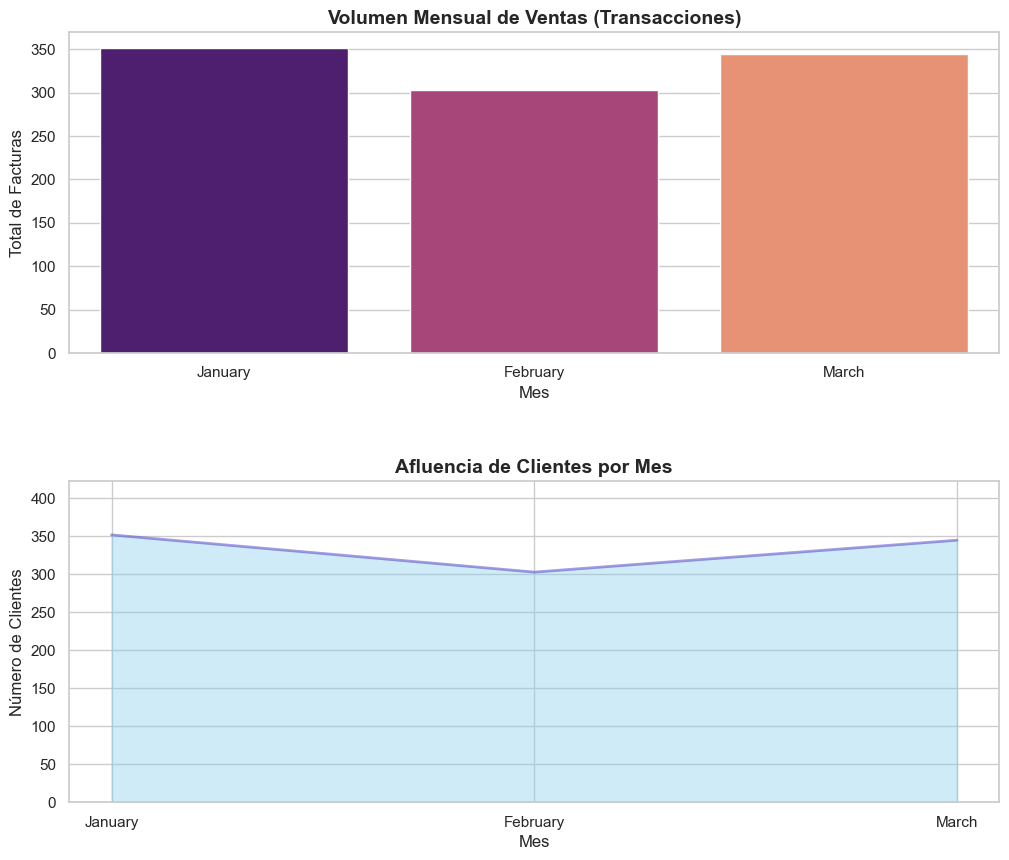

In [7]:
# Preparación de datos (asegurándonos de que estén ordenados cronológicamente)
monthly_counts = df.groupby(['Month_Num', 'Month']).agg({
    'Invoice ID': 'count',
    'Customer type': 'count'
}).reset_index().sort_values('Month_Num')

# Creamos una figura con dos subplots (uno arriba del otro)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4) # Espacio entre gráficos

# --- 1. Gráfico de Barras: Número de Ventas Mensuales ---
sns.barplot(data=monthly_counts, x='Month', y='Invoice ID', palette='magma', ax=ax1)
ax1.set_title('Volumen Mensual de Ventas (Transacciones)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Total de Facturas')

# --- 2. Gráfico de Área: Número de Clientes por Mes ---
# Usamos fill_between para crear el efecto de área
ax2.fill_between(monthly_counts['Month'], monthly_counts['Customer type'], color="skyblue", alpha=0.4)
ax2.plot(monthly_counts['Month'], monthly_counts['Customer type'], color="Slateblue", alpha=0.6, linewidth=2)

ax2.set_title('Afluencia de Clientes por Mes', fontsize=14, fontweight='bold')
ax2.set_xlabel('Mes')
ax2.set_ylabel('Número de Clientes')
ax2.set_ylim(0, monthly_counts['Customer type'].max() * 1.2) # Espacio extra arriba para estética

plt.show()

c:\Users\Beto\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Beto\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Beto\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


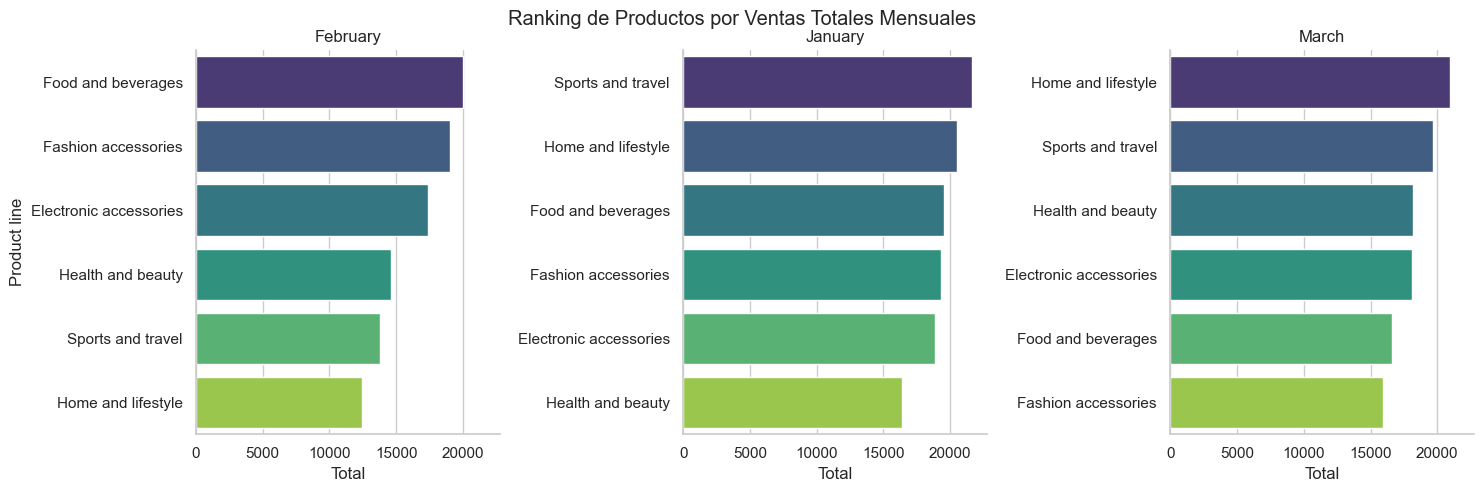

In [8]:
# --- REPORTE 3: Top 10 Items (Product Lines) por Mes ---
# Nota: Al haber solo 6 categorías de productos, el Top 10 mostrará todas, 
# pero el ranking se ajusta dinámicamente.
top_monthly = df.groupby(['Month', 'Product line'])['Total'].sum().reset_index()
top_monthly = top_monthly.sort_values(['Month', 'Total'], ascending=[True, False])

g = sns.FacetGrid(top_monthly, col="Month", col_wrap=3, height=5, sharey=False)
g.map_dataframe(sns.barplot, x="Total", y="Product line", palette="viridis")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Ranking de Productos por Ventas Totales Mensuales')
plt.show()